This is Qustion1:
This is equivelant to saying that Matrix Sigma is semi-difinate Matrix,
which means for any non-zero vector w, w * Sigam * w >= 0;
and w * Sigma * w in this case, is the variance of of the random variable w,
which means it cannot be negative
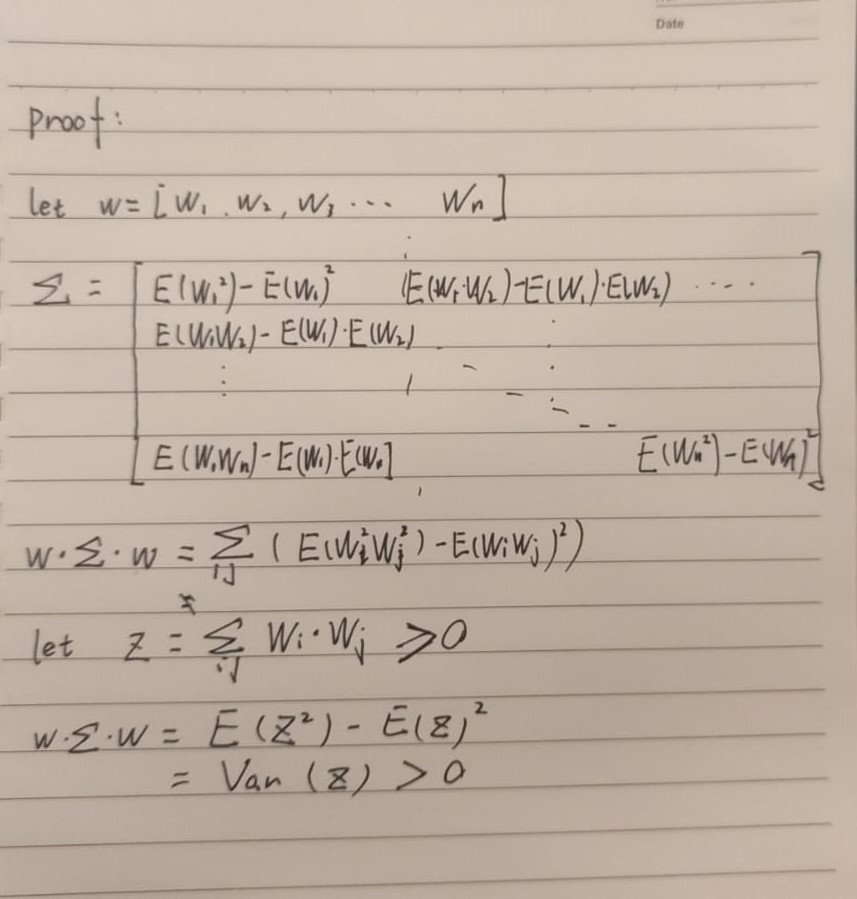


# 新段落

In [ ]:
#Q2
print("This is Question2")
import cvxpy as cp
import numpy as np  
import math
import matplotlib.pyplot as plt 
import time

beta = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06])
mean = np.array([0.02,0.003,0.07])
sigma = np.array([ [1.0,-0.03,0.02],[-0.03,1.0,-0.15],[0.02,-0.15,1.0] ])
e_return = []
variance = []
wb1=[]
# define constraints
start_time = time.time()
# define objective
for i in beta:
  w = cp.Variable( 3 )
  E_return = w[0]*mean[0]+w[1]*mean[1]+w[2]*mean[2]
  var = cp.quad_form(w, sigma)
  constraints3 = [E_return >= i]
  constraints1 = [w>=0]
  constraints2 = [cp.sum(w) == 1]
  constraints = [E_return >= i, w>=0, cp.sum(w) == 1]
  objective = cp.Minimize( var )
  # create problem
  prob = cp.Problem(objective,constraints)
  # solve it!
  result = prob.solve()
  e_return.append( E_return.value ) 
  variance.append( math.sqrt(var.value) )

end_time = time.time()
plt.xlabel("standrd deviation")
plt.ylabel("Expected return")
plt.scatter( variance, e_return )
print("The time required for method without using parameter:", end_time - start_time )

In [ ]:
#Q3
print("This is Question 3")
import cvxpy as cp
import numpy as np  
import math
import matplotlib.pyplot as plt 

beta = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065])
mean = np.array([0.02,0.003,0.07])
sigma = np.array([ [1.0,-0.03,0.02],[-0.03,1.0,-0.15],[0.02,-0.15,1.0] ])
e_return = []
variance = []
# define variable

# define constraints
wb1=[]
active = []
# define objective
for i in beta:
  w = cp.Variable( 3 )
  E_return = w[0]*mean[0]+w[1]*mean[1]+w[2]*mean[2]
  var = cp.quad_form(w, sigma)
  constraints3 = [E_return >= i]
  constraints1 = [w>=0]
  constraints2 = [cp.sum(w) == 1]
  constraints = [E_return >= i, w>=0, cp.sum(w) == 1]
  objective = cp.Minimize( var )
  # create problem
  prob = cp.Problem(objective,constraints)
  # solve it!
  result = prob.solve()
  wb1.append(w.value)
  e_return.append( E_return.value ) 
  variance.append( (var.value) )
  if ( math.fabs(E_return.value - i) <= 0.00000001 ):
    active.append(i)

fig, ax = plt.subplots()
ax.scatter(beta, e_return)
plt.xlabel("beta")
plt.ylabel("Expected return")
print("The solution using method without parameter when beta = 0.01:", wb1[2])
print("The expected return is active at ", active )
print("When beta >= 0.07, there is no possible solution w to the problem since u = [0.02,0.003,0.07] and all the components of w adds up to 1, so u*w <= 0.07")

In [ ]:
#Q4
print("This is question 4")
import cvxpy as cp
import numpy as np  
import math
import matplotlib.pyplot as plt 
import time

beta = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06])
mean = np.array([0.02,0.003,0.07])
sigma = np.array([ [1.0,-0.03,0.02],[-0.03,1.0,-0.15],[0.02,-0.15,1.0] ])
e_return = []
variance = []
# define variable
param = cp.Parameter(nonneg=True)
# define constraints
# define objective

w2 = cp.Variable( 3 )
E_return = w2[0]*mean[0]+w2[1]*mean[1]+w2[2]*mean[2]
var = cp.quad_form(w2, sigma)

constraints = [E_return >= param, w2>=0, cp.sum(w2) == 1]
objective = cp.Minimize( var )
# create problem
prob = cp.Problem(objective,constraints)
# solve it!
wb2 = []

#method using parameter
start_time = time.time()
for i in beta:
  param.value = i
  result = prob.solve()
  wb2.append(w2.value)
  e_return.append( E_return.value ) 
  variance.append( math.sqrt(var.value) )

end_time = time.time()
plt.scatter( variance, e_return )
plt.xlabel("standrd deviation")
plt.ylabel("Expected return")
print( "Solution w using method with parameter when beta is 0.01 ( using parameter method ): ", wb2[2] )
print( "According to Question 3, we can optain the same result using 2 methods " )
print( "Time required for method using parameter:", -start_time+end_time)
print("According to Qusetion2, Time required for method without using parameter ranges from: 0.14580798149108887 to 0.10079216957092285")
print("Conclusion: using parameter is about 3 times faster than not using parameter")

In [ ]:
#Q5
print("This is question5")
import cvxpy as cp
import numpy as np  
import math
import matplotlib.pyplot as plt 

beta = np.array([0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06])
mean = np.array([0.02,0.003,0.07])
sigma = np.array([ [1.0,-0.03,0.02],[-0.03,1.0,-0.15],[0.02,-0.15,1.0] ])
e_return = []
variance = []
# define variable

# define constraints


# define objective
for i in beta:
  w = cp.Variable( 3 )
  E_return = w[0]*mean[0]+w[1]*mean[1]+w[2]*mean[2]
  var = cp.quad_form(w, sigma)
  constraints3 = [E_return >= i]
  constraints1 = [w>=0]
  constraints2 = [cp.sum(w) == 1]
  constraints = [E_return == i, w>=0, cp.sum(w) == 1]
  objective = cp.Minimize( var )
  # create problem
  prob = cp.Problem(objective,constraints)
  # solve it!
  result = prob.solve()
  e_return.append( E_return.value ) 
  variance.append( math.sqrt(var.value) )

plt.scatter( variance, e_return )
plt.xlabel("standrd deviation")
plt.ylabel("Expected return")

This Qustion 5 Explanation:
the major difference between this and question2 is that when beta <= 0.03, the std( the risk ) begins to grow significantly and the expected return in Question 2 never drops below 0.03. This is because as we make the constraints stricter, there are fewer possible solution to the problem, thus making the result less optimized. And when beta >=0.035, the results are almost the same, this is because these points are active.